In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'
sns.set_style("whitegrid")

**EDA & Data Quality Analysis - <i>extract - cash request<i>**

In [27]:
#Reading and importing the CSV file for the analysis
cash_request_df = pd.read_csv("extract - cash request - data analyst.csv")

display(cash_request_df.head())

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [28]:

# Shape of the DataFrame (rows, columns)
data_shape_cr = cash_request_df.shape
print(f"\nShape of the DataFrame: {data_shape_cr}")

# Column names
column_names_cr = cash_request_df.columns
print(f"\nColumn Names: {column_names_cr}")



Shape of the DataFrame: (23970, 16)

Column Names: Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')


In [29]:
# General Information about the DataFrame
data_info_cr = cash_request_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [30]:
# Check for missing values in the DataFrame
missing_values_cr = pd.isnull(cash_request_df)

# Count missing values in each column
missing_counts_cr = missing_values_cr.sum()

# Count columns with missing values
columns_with_missing_cr = missing_counts_cr[missing_counts_cr > 0].count()

# Check if all columns have missing values
all_columns_missing_cr = missing_counts_cr.all()

# Calculate the total number of missing values
total_missing_values_cr = missing_counts_cr.sum()

# Display the results
print("Missing Values in Each Column:\n", missing_counts_cr)
print("\nNumber of Columns with Missing Values:", columns_with_missing_cr)
print("All Columns Have Missing Values:", all_columns_missing_cr)
print("\nTotal Missing Values in the DataFrame:", total_missing_values_cr)

Missing Values in Each Column:
 id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

Number of Columns with Missing Values: 9
All Columns Have Missing Values: False

Total Missing Values in the DataFrame: 116261


In [31]:
# Statistical Summary
data_summary = cash_request_df.describe()
print("\nStatistical Summary:")
print(round(data_summary,1))


Statistical Summary:
            id   amount   user_id  deleted_account_id
count  23970.0  23970.0   21867.0              2104.0
mean   13911.0     82.7   32581.3              9658.8
std     7788.1     26.5   27618.6              7972.7
min        3.0      1.0      34.0                91.0
25%     7427.2     50.0   10804.0              3767.0
50%    14270.5    100.0   23773.0              6121.5
75%    20607.8    100.0   46965.0             16345.0
max    27010.0    200.0  103719.0             30445.0


Text(0, 0.5, 'Cash Requests')

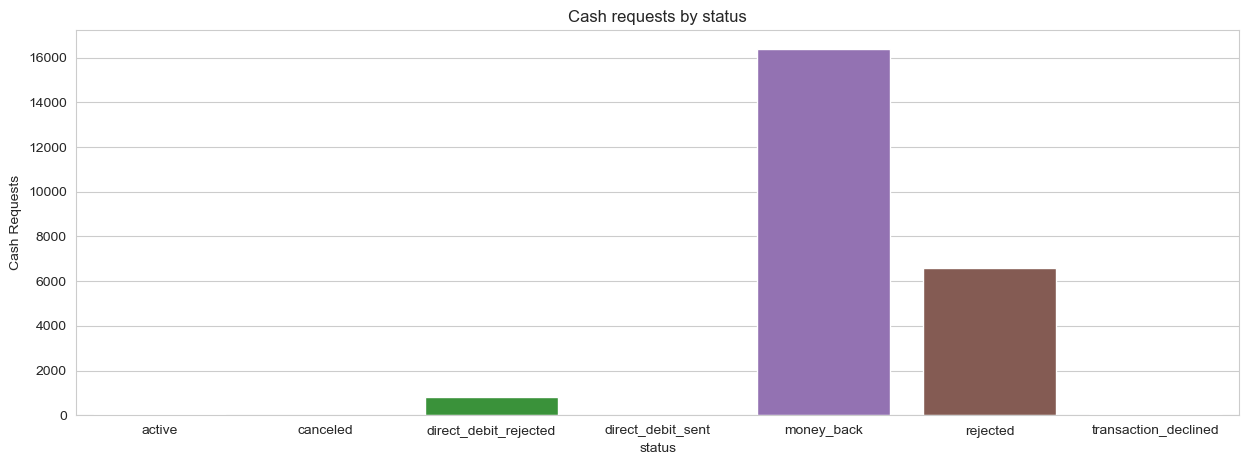

In [32]:
# Grouping the data by total of cash requests by "status" 
plt.figure(figsize=(15,5))
a=cash_request_df.groupby("status")["id"].count().reset_index()
barplot_cr = sns.barplot(x="status", y="id", data=a)
plt.title('Cash requests by status')
plt.ylabel('Cash Requests')

Text(0.5, 0, 'Requested Amount')

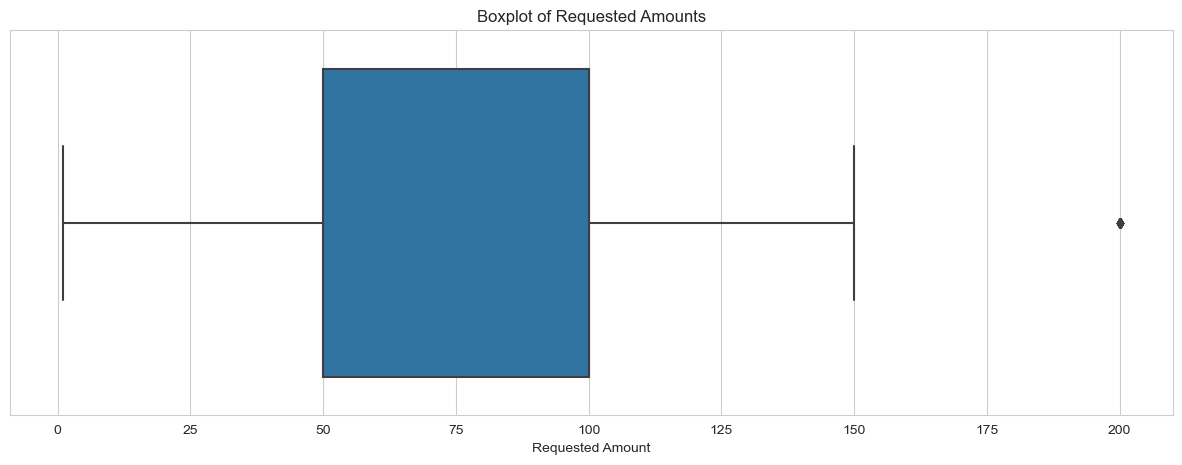

In [33]:
#Grouping the data in a scatterplot to have a better understanding of distribution of the amounts requested: 
plt.figure(figsize=(15,5))
sns.boxplot(x="amount", data = cash_request_df)
plt.title('Boxplot of Requested Amounts')
plt.xlabel('Requested Amount')

In [34]:
#Remove all rows where "user_id" is empty - ignoring ~10% of data
cash_request_df = cash_request_df.dropna(subset="user_id")

#Checking for duplicates values on column "ID":
dupl_cash_req = cash_request_df["id"].duplicated()
if dupl_cash_req.any():
    print ("Duplicated values found")
else:
    print ("Duplicated values not found")


Duplicated values not found


In [35]:
#Creating a new column "cohort", based on the year-month where the cash request was "created_at"

#Converting value to datatime
cash_request_df["created_at"] = pd.to_datetime(cash_request_df["created_at"]) 

#Getting month and year and store it into variables
cash_request_df["created_at_month"] = cash_request_df["created_at"].dt.month 
cash_request_df["created_at_year"] = cash_request_df["created_at"].dt.year

#Creating a new column with the aggregation of year + month
cash_request_df["cohort"] = cash_request_df["created_at_year"].astype(str) + "-" + cash_request_df["created_at_month"].astype(str).str.zfill(2)

**Data Quality Analysis - <i>extract - cash request - data analyst<i>**

In [36]:
#Reading and importing the CSV files for the analysis
fees_df = pd.read_csv("extract - fees - data analyst - .csv")

display(fees_df.head())

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [37]:

# Shape of the DataFrame (rows, columns)
data_shape_f = fees_df.shape
print(f"\nShape of the DataFrame: {data_shape_f}")

# Column names
column_names_f = fees_df.columns
print(f"\nColumn Names: {column_names_f}")


Shape of the DataFrame: (21061, 13)

Column Names: Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')


In [38]:
# General Information about the DataFrame
data_info_f = fees_df.info()
print(f"\nGeneral Information about the DataFrame:\n{data_info_f}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB

General Information about the DataFrame:
None



In [39]:
# Check for missing values in the DataFrame
missing_values_f = pd.isnull(fees_df)

# Count missing values in each column
missing_counts_f = missing_values_f.sum()

# Count columns with missing values
columns_with_missing_f = missing_counts_f[missing_counts_f > 0].count()

# Check if all columns have missing values
all_columns_missing_f = missing_counts_f.all()

# Calculate the total number of missing values
total_missing_values_f = missing_counts_f.sum()

# Display the results
print("Missing Values in Each Column:\n", missing_counts_f)
print("\nNumber of Columns with Missing Values:", columns_with_missing_f)
print("All Columns Have Missing Values:", all_columns_missing_f)
print("\nTotal Missing Values in the DataFrame:", total_missing_values_f)

Missing Values in Each Column:
 id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

Number of Columns with Missing Values: 5
All Columns Have Missing Values: False

Total Missing Values in the DataFrame: 50989


In [40]:
# Statistical Summary
data_summary = fees_df.describe()
print("\nStatistical Summary:")
print(round(data_summary),1)


Statistical Summary:
            id  cash_request_id  total_amount
count  21061.0          21057.0       21061.0
mean   10645.0          16318.0           5.0
std     6099.0           6656.0           0.0
min        1.0           1456.0           5.0
25%     5385.0          11745.0           5.0
50%    10652.0          17160.0           5.0
75%    15925.0          21796.0           5.0
max    21193.0          27010.0          10.0 1


Text(0.5, 0, 'Requested Amount')

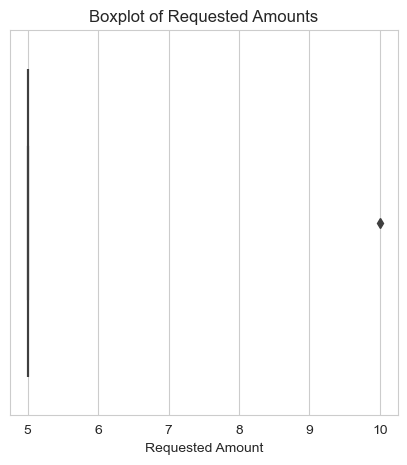

In [41]:
#Grouping the data in a scatterplot to have a better understanding of distribution of the fees paid: 
plt.figure(figsize=(5,5))
sns.boxplot(x="total_amount", data = fees_df)
plt.title('Boxplot of Requested Amounts')
plt.xlabel('Requested Amount')

In [42]:
#Checking for duplicates values on column "cash_request_id":
dupl_f = fees_df["cash_request_id"].duplicated()
if dupl_f.any():
    print ("Duplicated values found")
else:
    print ("Duplicated values not found")

#Remove all rows (4) where cash_request_id is empty
fees_df = fees_df.dropna(subset=["cash_request_id"])
cleaned_fees_df = fees_df.groupby("cash_request_id")["total_amount"].sum().reset_index()

display(cleaned_fees_df.head())

dupl_f_new = cleaned_fees_df["cash_request_id"].duplicated()
if dupl_f_new.any():
    print ("Duplicated values found")
else:
    print ("Duplicated values not found")

Duplicated values found


,cash_request_id,total_amount
0,1456.0,5.0
1,1503.0,15.0
2,1518.0,40.0
3,1554.0,20.0
4,1556.0,5.0


Duplicated values not found


**Merging the DataFrames**

In [43]:
# Specifing the columns to be included from each dataframe
    #print(filtered_cash_request_df.columns)
    #print(cleaned_fees_df.columns)

columns_to_include_cr = ['id', 'amount', 'status', 'created_at', 'created_at_month', 'created_at_year', 'cohort', 'user_id','transfer_type']

columns_to_include_fees = ['cash_request_id', 'total_amount']

#Merge the two DataFrames based on the 'id' column and include only the specified columns
ih_payments_raw = cash_request_df[columns_to_include_cr].set_index("id").join(cleaned_fees_df[columns_to_include_fees].set_index("cash_request_id"),how='left').reset_index()

ih_payments = ih_payments_raw.dropna(subset=["user_id"])

#Converting columns data types
ih_payments["id"] = ih_payments["id"].astype(int)
ih_payments["amount"] = ih_payments["amount"].astype(int)
ih_payments["user_id"] = ih_payments["user_id"].astype(int)
ih_payments["total_amount"].fillna(0,inplace=True) #replace the NaN values with 0
ih_payments["total_amount"] = ih_payments["total_amount"].astype(int)

ih_payments.rename(columns={"id":"cash_request_id"}, inplace=True)
ih_payments.rename(columns={"total_amount":"fees_total_amount"}, inplace=True)

display(ih_payments.head())


,cash_request_id,amount,status,created_at,created_at_month,created_at_year,cohort,user_id,transfer_type,fees_total_amount
0,5,100,rejected,2019-12-10 19:05:21.596873+00:00,12,2019,2019-12,804,regular,0
1,70,100,rejected,2019-12-10 19:50:12.347780+00:00,12,2019,2019-12,231,regular,0
2,7,100,rejected,2019-12-10 19:13:35.825460+00:00,12,2019,2019-12,191,regular,0
3,10,99,rejected,2019-12-10 19:16:10.880172+00:00,12,2019,2019-12,761,regular,0
4,1594,100,rejected,2020-05-06 09:59:38.877376+00:00,5,2020,2020-05,7686,regular,0


**Metrics Calculation**

Service Usage:
    Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.

In [44]:
#Groupped by cohort to understand how many cash requests were done in each cohort
freq_usage_cohort = ih_payments.groupby(["cohort"])["cash_request_id"].nunique().reset_index(name="usage_frequency_cohort")

freq_usage_cohort

,cohort,usage_frequency_cohort
0,2019-11,1
1,2019-12,230
2,2020-01,176
3,2020-02,157
4,2020-03,207
5,2020-04,418
6,2020-05,727
7,2020-06,2251
8,2020-07,3159
9,2020-08,3090


Incident Rate: 
    Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.

In [45]:
#Checking the distinct values in column "status"
distinct_values = ih_payments['status'].unique()
distinct_values
incidents = ["rejected","direct_debit_rejected","transaction_declined","canceled"] #failed status

In [46]:
# Filter to show only payment incidents
payment_incidents = ih_payments[ih_payments['status'].isin(incidents)]

# Group by 'cohort' and count the number of payment incidents for each cohort
incident_counts = payment_incidents.groupby('cohort').size().reset_index(name='incident_count')

# Group the original df by 'cohort' and count the total number of cash requests for each cohort
total_transactions = ih_payments.groupby('cohort').size().reset_index(name='total_transactions')

# Merge the incident counts and total cash requests
incident_rates = pd.merge(incident_counts, total_transactions, on='cohort', how='left')

# Calculate the incident rate by dividing the incident count by the total cash requests and * 100 to get %, round up to 1 float
incident_rates['incident_rate'] = round((incident_rates['incident_count'] / incident_rates['total_transactions']) * 100 ,1)

incident_rates


,cohort,incident_count,total_transactions,incident_rate
0,2019-11,1,1,100.0
1,2019-12,102,230,44.3
2,2020-01,92,176,52.3
3,2020-02,61,157,38.9
4,2020-03,58,207,28.0
5,2020-04,134,418,32.1
6,2020-05,184,727,25.3
7,2020-06,798,2251,35.5
8,2020-07,1364,3159,43.2
9,2020-08,1240,3090,40.1


Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

In [47]:
# 'fees_total_amount' represents the total fees associated with each cash request
# Group by'cohort' and sum the fees for each cohort
revenue_by_cohort = ih_payments.groupby('cohort')['fees_total_amount'].sum().reset_index(name='total_revenue')
revenue_by_cohort.sort_values(by="cohort",ascending=True)


,cohort,total_revenue
0,2019-11,0
1,2019-12,0
2,2020-01,0
3,2020-02,0
4,2020-03,0
5,2020-04,5
6,2020-05,1205
7,2020-06,7720
8,2020-07,9390
9,2020-08,16785


New Relevant Metric: Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.

As an extra metric, it was calculated the Fees aplication rate, to understand how many of the cash requests have fees associated or not. All the cohorts with fees associated generated an income to the company.


In [48]:
# Group by 'cohort' and count the total of cash requests in each cohort
total_cash_requests_by_cohort = ih_payments.groupby("cohort").size().reset_index(name="total_cash_requests")

# Group by 'cohort' and count the cash requests with a fee associated in each cohort
cash_requests_with_fee_by_cohort = ih_payments[ih_payments["fees_total_amount"] > 0].groupby("cohort").size().reset_index(name="total_fee_requests")

# Merge total cash requests and total fee requests
f_by_cohort = pd.merge(total_cash_requests_by_cohort, cash_requests_with_fee_by_cohort, on="cohort", how="left")

# Replace NaN values of 'total_fee_requests' with 0
f_by_cohort["total_fee_requests"]=f_by_cohort["total_fee_requests"].fillna(0).astype(int)

# Calculate % of fees over the requests for each cohort
f_by_cohort['%_fees_requests_by_cohort'] = round((f_by_cohort['total_fee_requests'] / f_by_cohort['total_cash_requests']) * 100,1)

f_by_cohort


,cohort,total_cash_requests,total_fee_requests,%_fees_requests_by_cohort
0,2019-11,1,0,0.0
1,2019-12,230,0,0.0
2,2020-01,176,0,0.0
3,2020-02,157,0,0.0
4,2020-03,207,0,0.0
5,2020-04,418,1,0.2
6,2020-05,727,90,12.4
7,2020-06,2251,624,27.7
8,2020-07,3159,807,25.5
9,2020-08,3090,1612,52.2


In [49]:
#Exporting the dataset to use in Tableau
ih_payments.to_csv('ih_payments.csv', index=False)